<a href="https://colab.research.google.com/github/Rohit050798/Projects-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd  #data processing
import io 
uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['Tesla.csv']))
print (df.head())

Saving Tesla.csv to Tesla.csv
        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
len(df)/360

4.7

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
##train test validation split of data

In [8]:
length_data= len(df)
split_ratio=0.7 #0.7=70% data goes for training and 30% will be used for validation (testing)
length_train = round(length_data*split_ratio)
length_validation = length_data- length_train
print("*****************************************")
print("Total length",length_data)
print("tarining length",length_train)
print("validation length",length_validation)
print("*****************************************")

*****************************************
Total length 1692
tarining length 1184
validation length 508
*****************************************


In [9]:
int(len(df)*0.7)

1184

In [10]:
train_data= df[:length_train].iloc[:,:2]
train_data['Date']=pd.to_datetime(train_data["Date"])
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [11]:
Val_data= df[length_train:].iloc[:,:2]
Val_data['Date']=pd.to_datetime(Val_data["Date"])
Val_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [14]:
dataset_train= train_data.Open.values
dataset_train.shape


(1184,)

In [15]:
#We will use numpy array to reshape
dataset_train= np.reshape(dataset_train,(-1,1))
dataset_train.shape



(1184, 1)

In [ ]:
#Normalizing the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,2))

#scalaing the data
dataset_train_scaled = scaler.fit_transform(dataset_train)
print(dataset_train.shape)
print(dataset_train_scaled.shape)

(1184, 1)
(1184, 1)


In [18]:
print(dataset_train)
print(dataset_train_scaled)

[[ 19.      ]
 [ 25.790001]
 [ 25.      ]
 ...
 [188.460007]
 [191.149994]
 [193.75    ]]
[[0.02106582]
 [0.07107871]
 [0.06525983]
 ...
 [1.26925201]
 [1.28906556]
 [1.30821634]]


In [20]:
print(max(dataset_train))
print(dataset_train_scaled.shape)

[287.670013]
(1184, 1)


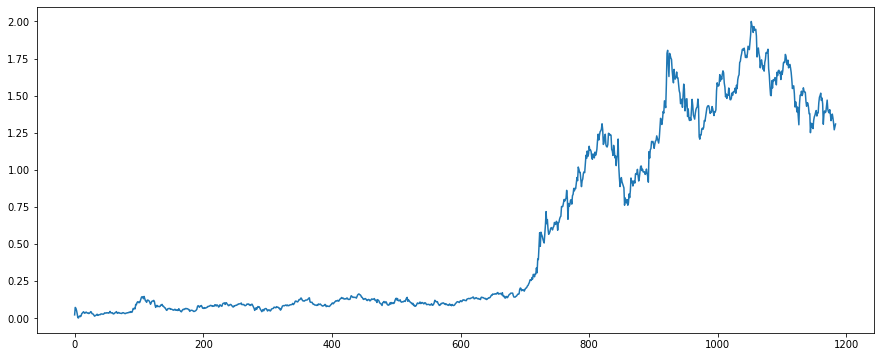

In [24]:
plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel=("Days")
plt.ylabel=("Open Price")
plt.show()

In [27]:
X_train = [] # We created List here will convert to NP array after loop
Y_train = []

time_step = 50
for i in range (time_step, length_train):
  X_train.append(dataset_train_scaled[i-time_step:i,0])
  Y_train.append(dataset_train_scaled[i,0])



In [29]:
print(len(X_train[1]))

50


In [30]:
X_train, Y_train = np.array(X_train) ,np.array(Y_train)

In [33]:
X_train.shape


(1134, 50)

In [34]:
Y_train.shape

(1134,)

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
Y_train = np.reshape (Y_train, (Y_train.shape[0],1))
print(X_train.shape)
print(Y_train.shape)

(1134, 50, 1)
(1134, 1)


In [40]:
from keras.models import Sequential 
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout



In [42]:
#initialize the RNN
regressor = Sequential()

#Adding the first RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
              input_shape = (X_train.shape[1],1))
            )
regressor.add(
    Dropout(0.2)
)

#Adding the second RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
             )
            )
regressor.add(
    Dropout(0.2)
)

#Adding the Third RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
             )
            )
regressor.add(
    Dropout(0.2)
)

#Adding the Fourth RNN layer and then use dropout on it to regularize
regressor.add(
    SimpleRNN(units = 50,
              activation='tanh',
              return_sequences= True,
             )
            )
regressor.add(
    Dropout(0.2)
)

# adding the output layer
regressor.add(Dense(units = 1))


In [43]:
#compliling
regressor.compile (
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"]
)
history = regressor.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
36/36 [==============================] - 7s 61ms/step - loss: 0.2562 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 2s 65ms/step - loss: 0.1011 - accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 3s 88ms/step - loss: 0.0736 - accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 2s 60ms/step - loss: 0.0604 - accuracy: 0.0000e+00
Epoch 5/50
36/36 [==============================] - 2s 59ms/step - loss: 0.0537 - accuracy: 0.0000e+00
Epoch 6/50
36/36 [==============================] - 2s 59ms/step - loss: 0.0511 - accuracy: 0.0000e+00
Epoch 7/50
36/36 [==============================] - 2s 59ms/step - loss: 0.0437 - accuracy: 0.0000e+00
Epoch 8/50
36/36 [==============================] - 3s 95ms/step - loss: 0.0414 - accuracy: 0.0000e+00
Epoch 9/50
36/36 [==============================] - 2s 62ms/step - loss: 0.0389 - accuracy: 0.0000e+00
Epoch 10/50
36/36 [==============================] - 2s 61ms/step - loss:

In [44]:
history.history["loss"]

[0.2562365233898163,
 0.10110194981098175,
 0.07361572235822678,
 0.0604141540825367,
 0.053683724254369736,
 0.05108633264899254,
 0.0437253974378109,
 0.04142729938030243,
 0.03886505588889122,
 0.03715382516384125,
 0.03487961366772652,
 0.03302755579352379,
 0.0322151854634285,
 0.03402119129896164,
 0.03139467164874077,
 0.0295259952545166,
 0.031659599393606186,
 0.029311807826161385,
 0.028869932517409325,
 0.027023911476135254,
 0.027091413736343384,
 0.027234381064772606,
 0.026540705934166908,
 0.025733787566423416,
 0.026660233736038208,
 0.026541437953710556,
 0.026090890169143677,
 0.02454988844692707,
 0.025061966851353645,
 0.024184739217162132,
 0.02585550583899021,
 0.026181494817137718,
 0.023994620889425278,
 0.023887457326054573,
 0.024024982005357742,
 0.0235025305300951,
 0.02505630813539028,
 0.023819005116820335,
 0.023769494146108627,
 0.023157548159360886,
 0.026336107403039932,
 0.024361127987504005,
 0.023861218243837357,
 0.02371867001056671,
 0.02314893528